# The goal of this notebook is to achieve (autonomous) music generation.

# Step 1 : Getting the preliminary clean_midi dataset (cleaned subset of lakh midi)

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p !mkdir -p ~/.kaggle
#upload kaggle.json to working directory for this
!cp -f ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imsparsh/lakh-midi-clean

Dataset URL: https://www.kaggle.com/datasets/imsparsh/lakh-midi-clean
License(s): CC-BY-NC-SA-4.0
100% 225M/226M [00:02<00:00, 73.0MB/s]
100% 226M/226M [00:02<00:00, 93.8MB/s]


In [ ]:
!unzip lakh-midi-clean.zip -d clean_midi

Streaming output truncated to the last 5000 lines.
  inflating: clean_midi/Rogers_Kenny/She_Believes_In_Me.mid  
  inflating: clean_midi/Rogers_Kenny/The_Gambler.1.mid  
  inflating: clean_midi/Rogers_Kenny/The_Gambler.2.mid  
  inflating: clean_midi/Rogers_Kenny/The_Gambler.mid  
  inflating: clean_midi/Rogers_Kenny/Through_the_Years.mid  
  inflating: clean_midi/Romantics/Talking_In_Your_Sleep.mid  
  inflating: clean_midi/Romantics/What_I_Like_About_You.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Domani,_domani.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Felicita.1.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Felicita.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Sempre_sempre.1.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Sempre_sempre.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Sha-e-o.1.mid  
  inflating: clean_midi/Romina_Power_Al_Bano/Sha-e-o.mid  
  inflating: clean_midi/Ron/Ferite_e_lacrime_You_.1.mid  
  inflating: clean_midi/Ron/Ferite_

In [ ]:
!rm lakh-midi-clean.zip

# Step 2: MIDI Exploration
(direct copy of the notebook, for now just to see if any irregularities from the other guy)

In [ ]:
!pip install pretty-midi librosa pandas music21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=ef56a5c59aaf475c69a68498e0b3713723102e80c32de87aa267ce423c3f35a4
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty-midi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pretty_midi
import librosa.display as display
import os
import pandas as pd

# Local path constant
DATA_PATH = './clean_midi'

<ipython-input-11-4d46e59cbe19>:8: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)


Text(0.5, 1.0, 'Head_Like_a_Hole.mid')

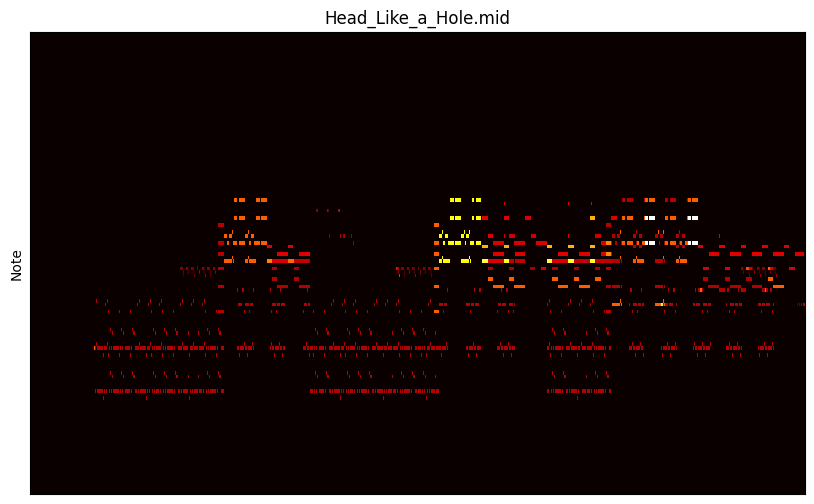

In [ ]:
song_name = "Head_Like_a_Hole.mid"

pm = pretty_midi.PrettyMIDI(os.path.join(DATA_PATH, "Nine_Inch_Nails/{}".format(song_name)))

piano_roll = pm.get_piano_roll()

plt.figure(figsize=(10, 6))
display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)
plt.title(song_name)

In [ ]:
'''
LIST ALL INSTRUMENTS
'''
for instrument in pm.instruments:
    print(instrument)

Instrument(program=81, is_drum=False, name="Bassline (Lead 2 - Sawtooth)")
Instrument(program=81, is_drum=False, name="Bassline -1 Octave")
Instrument(program=77, is_drum=False, name="Shakuhachi")
Instrument(program=29, is_drum=False, name="Overdriven Guitar")
Instrument(program=30, is_drum=False, name="Distortion Guitar")
Instrument(program=18, is_drum=False, name="Rock Organ")
Instrument(program=65, is_drum=False, name="Alto Sax")
Instrument(program=1, is_drum=True, name="Drums")


In [ ]:
'''
get notes for a specific instrument
'''
instrument_no = 3

instrument = pm.instruments[instrument_no]
instrument_piano_roll = instrument.get_piano_roll()

cols = ['start', 'end', 'pitch', 'velocity']

note_seq = []
for index, note in enumerate(instrument.notes):
    note_seq.append([note.start, note.end, note.pitch, note.velocity])

note_df = pd.DataFrame(note_seq, columns=cols)
note_df.head()

,start,end,pitch,velocity
0,58.434768,59.126072,62,83
1,59.217377,59.821724,62,83
2,60.521724,61.213028,62,83
3,61.304333,61.908680,62,83
4,62.608680,63.299984,62,83


In [ ]:
note_seq_np = np.zeros((len(instrument.notes), 4))
for index, note in enumerate(instrument.notes):
    note_seq_np[index] = [note.start, note.end, note.pitch, note.velocity]

note_seq_np

array([[ 58.434768  ,  59.12607218,  62.        ,  83.        ],
       [ 59.2173765 ,  59.82172418,  62.        ,  83.        ],
       [ 60.521724  ,  61.21302818,  62.        ,  83.        ],
       ...,
       [299.478186  , 299.60427293,  52.        ,  99.        ],
       [299.7390555 , 299.86514243,  52.        , 106.        ],
       [299.999925  , 300.16949018,  52.        , 113.        ]])

<ipython-input-15-c0801c9d3664>:11: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(encoded.T.values, y_axis='cqt_note', cmap=plt.cm.hot)


,C-1,C#-1,D-1,D#-1,E-1,F-1,F#-1,G-1,G#-1,A-1,...,A#8,B8,C9,C#9,D9,D#9,E9,F9,F#9,G9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


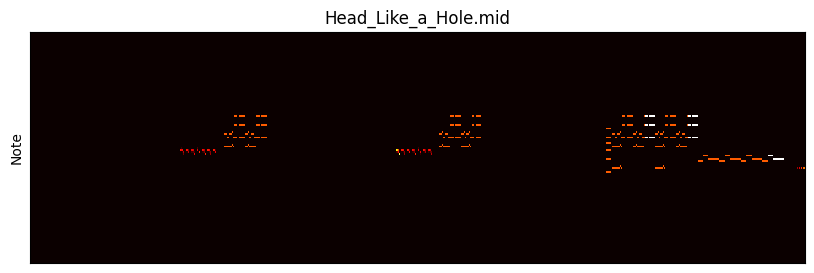

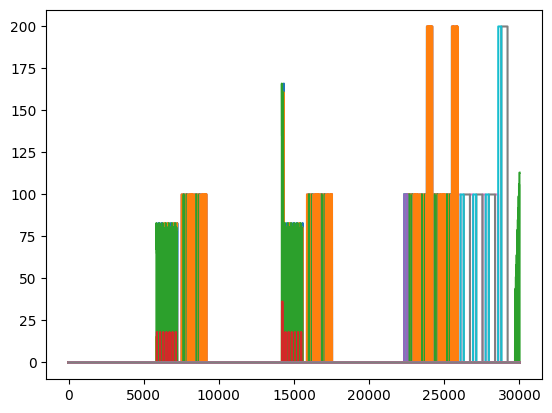

In [ ]:
columns = [pretty_midi.note_number_to_name(n) for n in range(0,128)]
def encode_dummies(instrument):
    """ Gonna cheat a little bit by transposing the instrument piano roll.
        However, that leaves us with a lot of blank space.
    """
    return pd.DataFrame(instrument.get_piano_roll().T, columns=columns)

encoded = encode_dummies(instrument)

plt.figure(figsize=(10, 3))
display.specshow(encoded.T.values, y_axis='cqt_note', cmap=plt.cm.hot)
plt.title(song_name)
encoded.plot(legend=False)

# What's the numbers on the y axis? Is this the velocity? Can maybe ignore this and code it as 1's
encoded.head()

<ipython-input-16-6be5d3fc41bb>:8: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(trimmed.T.values, y_axis='cqt_note', cmap=plt.cm.hot)


,C-1,C#-1,D-1,D#-1,E-1,F-1,F#-1,G-1,G#-1,A-1,...,A#8,B8,C9,C#9,D9,D#9,E9,F9,F#9,G9
5843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


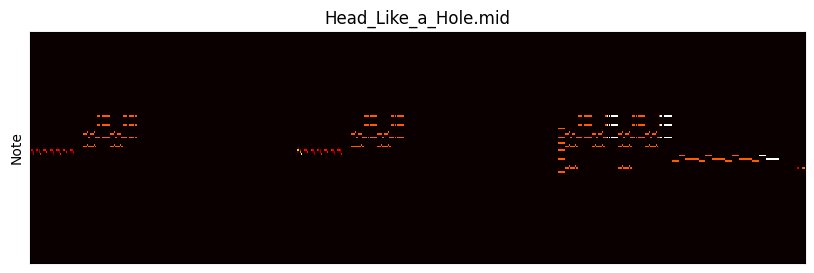

In [ ]:
def trim_blanks(df):
    nonzero = df.apply(lambda s: s != 0)
    first_nonzero = df[nonzero].apply(pd.Series.first_valid_index).min()
    return df.iloc[int(first_nonzero):]

trimmed = trim_blanks(encoded)
plt.figure(figsize=(10, 3))
display.specshow(trimmed.T.values, y_axis='cqt_note', cmap=plt.cm.hot)
plt.title(song_name)

trimmed.head()

In [ ]:
trimmed = trimmed.loc[:, (trimmed != 0).any(axis=0)]
trimmed.head()

,D3,E3,F3,G#3,A3,B3,C4,C#4,D4,D#4,E4,F4,F#4,A4,B4,C5,D5,E5,A5
5843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,83.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,83.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59375,80.40625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59375,80.40625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59375,80.40625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 3: Loading instruments

In [ ]:
import glob
import os
import pandas as pd

import pretty_midi

from IPython.display import clear_output

In [ ]:
SEARCH_CRITERION = '**/*.mid'

In [ ]:
midi_files = glob.glob(os.path.join(DATA_PATH, SEARCH_CRITERION), recursive=True)

In [ ]:
# Save the filepath for a second pass loading the piano rolls for each instrument we will use

limit = -1

instrument_ary = [[]]
instrument_ary.append(['program', 'is_drum', 'name', 'filepath'])
# This might take a while...
for index, file in enumerate(midi_files[:limit]):
    clear_output(wait=True)
    print("{}/{}: Loading and parsing {}.".format(index, len(midi_files), os.path.basename(file)))
    try:
        pm = pretty_midi.PrettyMIDI(file)
        instruments = pm.instruments

        for instrument in instruments:
            instrument_ary.append([instrument.program, instrument.is_drum, instrument.name.replace(';',''), file])
    except:
        # For now, just ignore files we can't load.
        continue

17217/17219: Loading and parsing Cherry_Lips.mid.


In [ ]:
df = pd.DataFrame(data=instrument_ary, columns=["program", "is_drum", "name", "filepath"])
df = df.dropna()
df.head()

,program,is_drum,name,filepath
1,program,is_drum,name,filepath
2,32,False,ACOU BASS,./clean_midi/Fluid/On_My_Feet.mid
3,5,False,E.PIANO 2,./clean_midi/Fluid/On_My_Feet.mid
4,1,False,A.PIANO 2,./clean_midi/Fluid/On_My_Feet.mid
5,50,False,SYN STR 1,./clean_midi/Fluid/On_My_Feet.mid


In [ ]:
file_name = 'instruments.csv'
df.to_csv(file_name, sep=';', encoding='utf-8')

In [ ]:
# Show the instrument with the most unique filepath values
df.groupby('program').nunique().sort_values('filepath', ascending=False)

,is_drum,name,filepath
program,,,
0,2,7282,14196
33,2,1588,5716
25,2,1967,5060
48,2,1656,4856
27,2,1620,4315
...,...,...,...
113,2,33,75
121,2,46,71
123,1,41,71


In [ ]:
from google.colab import files
files.download('instruments.csv')

AttributeError: 'list' object has no attribute 'csv'

# Step 4: Data Preprocessing:

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import librosa.display as display
import matplotlib.pyplot as plt
%matplotlib inline

import pretty_midi


from IPython.display import clear_output

In [ ]:
instruments = pd.read_csv('instruments.csv', sep=';', index_col=0)
instruments.head()

<ipython-input-27-c2f8b3f979cb>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  instruments = pd.read_csv('instruments.csv', sep=';', index_col=0)


,program,is_drum,name,filepath
1,program,is_drum,name,filepath
2,32,False,ACOU BASS,./clean_midi/Fluid/On_My_Feet.mid
3,5,False,E.PIANO 2,./clean_midi/Fluid/On_My_Feet.mid
4,1,False,A.PIANO 2,./clean_midi/Fluid/On_My_Feet.mid
5,50,False,SYN STR 1,./clean_midi/Fluid/On_My_Feet.mid


In [ ]:
# Show the instrument with the most unique filepath values
grouped = instruments.groupby('program').nunique().sort_values('filepath', ascending=False)
grouped.head(n=10)

,is_drum,name,filepath
program,,,
0,2,6039,10881
33,2,1250,4368
25,2,1562,3908
48,2,1305,3761
27,2,1290,3337
0,2,2002,3315
29,2,1409,3298
35,2,795,3186
30,2,1261,2776


In [ ]:
# Translate the program codes to instrument names
for program in grouped.head(n=10).index.values:
    print(pretty_midi.program_to_instrument_name(int(program)))
#

Acoustic Grand Piano
Electric Bass (finger)
Acoustic Guitar (steel)
String Ensemble 1
Electric Guitar (clean)
Acoustic Grand Piano
Overdriven Guitar
Fretless Bass
Distortion Guitar
Choir Aahs


In [ ]:
pianos = instruments[(instruments['program'] == 0) & (instruments['name'].str.contains('piano', case=False))]
print(len(pianos))
pianos.head(n=10)

878


,program,is_drum,name,filepath
131153,0,False,#A.Piano,./clean_midi/Rupert_Holmes/Escape_Pina_Colada_...
131254,0,False,A.PIANO 1,./clean_midi/Allen_Toussaint/Whirlaway.mid
131280,0,False,Piano,./clean_midi/Roxy_Music/Avalon.mid
131304,0,False,A.PIANO 1,./clean_midi/Roxy_Music/Avalon.1.mid
131320,0,False,A.PIANO 1,./clean_midi/Scorpions/Johnny_B._Goode.mid
131377,0,False,A.PIANO 1,./clean_midi/Scorpions/Hello_Josephine.mid
131415,0,False,A.PIANO 1,./clean_midi/Foster_David/Love_Theme_From_St._...
131419,0,False,A.PIANO 1,./clean_midi/Foster_David/Love_Theme_From_St._...
131602,0,False,A.PIANO 1,./clean_midi/Desireless/Voyage_Voyage.1.mid
131629,0,False,A.PIANO 1,./clean_midi/Kadoc/The_Night_Train.mid


In [ ]:
note_columns = [pretty_midi.note_number_to_name(n) for n in range(0,128)]
def encode_dummies(instrument, sampling_freq):
    """ Gonna cheat a little bit by transposing the instrument piano roll.
        However, that leaves us with a lot of blank space.
        Coercing to type uint8, since the max velocity is 127, and there are also only 128 notes. uint8 goes to 255.
        Saves memory
    """
    pr = instrument.get_piano_roll(fs=sampling_freq).astype('uint8').T
    return pd.DataFrame(pr, columns=note_columns)

def trim_blanks(df):
    """
        Remove the first period of no activity (fast forward to where the first note begins for this instrument)
    """
    nonzero = df.apply(lambda s: s != 0)
    nonzeroes = df[nonzero].apply(pd.Series.first_valid_index)
    first_nonzero = nonzeroes.min()
    if first_nonzero is np.nan:
        return None
    return df.iloc[int(first_nonzero):]

"""
    Create a pandas to store the piano rolls in.
    It'll look a bit like this:

    |   Index     | t | C0 |...| C10 |
    |Song_name_3:0| 0 | 40 |...| 0   |
    |             | 1 | 40 |...| 0   |
    |             |...|... |...| ... |
    |             | N | 40 |...| 0   |
    |Song_name_3:1| 0 | 40 |...| 0   |
    |             |...|... |...| ... |
    |             | N | 40 |...| 0   |
    |Song_name_4:0| 0 | 40 |...| 0   |
    |             |...|... |...| ... |
    |             | N | 40 |...| 0   |

"""
saved_columns = [pretty_midi.note_number_to_name(n) for n in range(48,108)]
piano_rolls = pd.DataFrame(columns=['piano_roll_name', 'timestep'] + saved_columns)
piano_rolls = piano_rolls.set_index(['piano_roll_name', 'timestep'])
piano_rolls.head()

,,C3,C#3,D3,D#3,E3,F3,F#3,G3,G#3,A3,...,D7,D#7,E7,F7,F#7,G7,G#7,A7,A#7,B7
piano_roll_name,timestep,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Chops off the upperbound and lowerbound of zeros
# The lower bound note is set a C, which might make it easier
# to make the MIDI play in the same key.
def chopster(dframe):
    # Figure out range of frame (0-128)
    df_max = dframe.max(axis = 0)

    dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(108,128)], axis=1, inplace=True)
    dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(0,48)], axis=1, inplace=True)
    return dframe
#     for i in range(len(df_max)-1, 0, -1):
#         if df_max[i] != 0:
#             upper_bound_C = i
#             for j in range(len(df_max)):
#                 if df_max[j] != 0:
#                     lower_bound_C = j-(j%12)
#                     dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(upper_bound_C,128)], axis=1, inplace=True)
#                     dframe.drop(labels=[pretty_midi.note_number_to_name(n) for n in range(0,lower_bound_C)], axis=1, inplace=True)

#                     break
#             break
#     return dframe

# Non-zero values changed to 1's
def minister(dframe):
    return dframe.where(dframe<1, 1)


# Removes chords and turns them into melody
def arpster(dframe):
    # Count amount of notes being played at once.
    note_amount = np.asarray(dframe.astype(bool).sum(axis=1))
    i = 0

    # Slide through whole MIDI
    while i < dframe.shape[0]:
        # Check if note is single
        if note_amount[i] == 1:
            i += 1
            continue
        elif note_amount[i] > 1:
            hits = 0
            hit_index = []
            # Calculates the amount of notes being played
            for j in range(dframe.shape[1]):
                if dframe.iloc[i,j] == 1:
                    hit_index.append(j)
                    hits += 1
                    if hits == note_amount[i]:
                        break

            length = 0

            # Removes all notes such that chords are turned into arpeggios.
            # Ensures that all values in hit_index are the same as ones in
            # dframe row.
            while False not in (dframe.iloc[i+length, hit_index] == 1).values:
                for k in range(len(hit_index)):
                    if k != (length % hits):
                        dframe.iloc[i+length, hit_index[k]] = 0
                length += 1
                if len(note_amount) <= i+length or note_amount[i+length-1] != note_amount[i+length]:
                    break

            # Skip ahead to next note
            i += length

        # Maybe a case where we count ithe amount of silent steps going ahead
        elif note_amount[i] == 0:
            i += 1
            continue

    return dframe

# Chops up into desired window size.
# and maybe saves them to csv in this step?
# frame_size: amount of measures pr input
def cutster(dframe, frame_size, undesired_silence):
    # Chop up if the window size fits the music

    # Check if frame size is greater than MIDI length
    # Pad with zeros
    if frame_size > dframe.shape[0]/16:
        return dframe

    note_amount = np.asarray(dframe.astype(bool).sum(axis=1))
    zero_amount = 0

    df_dictionary = {}
    dict_index = 0

    divider = 0
    i = 0
    while i < len(note_amount):
        # Cuts out silent measures if greater than undesired_silence
        if zero_amount/16 > undesired_silence and note_amount[i] != 0:
            drop_amount = [j for j in range(i-zero_amount,i)]
            dframe.drop(drop_amount, inplace=True)
            note_amount = np.delete(note_amount, drop_amount)
            i -= zero_amount-1
            zero_amount = 0

        elif note_amount[i] != 0:
            if zero_amount != 0:
                zero_amount = 0
            i += 1
        # Count sequential zeros
        elif note_amount[i] == 0:
            zero_amount += 1
            i += 1

    return dframe

# Add desired amount of padding to
# all MIDI files such that they contain
# the same amount of dimensions.
def padster(dframe):
    # Find MIDI piece with most keys used
    # Pad all others such they fit the dimensions
    return dframe.fillna(0)



In [ ]:
# DISCLAIMER:
# This file is inspired by Nick Kelly by his article on tranposing MIDI files.
# http://nickkellyresearch.com/python-script-transpose-midi-files-c-minor/

import music21

# Transpose MIDI to same key (C major or A minor)
def transposer(midi_file):
    midi_array = midi_file.split('/')

    # converting everything into the key of C major or A minor
    # Major conversion
    majors = dict([("A-", 4),("G#", 4),("A", 3),("A#", 2),("B-", 2),("B", 1),("C", 0),("C#", -1),("D-", -1),("D", -2),("D#", -3),("E-", -3),("E", -4),("F", -5),("F#", 6),("G-", 6),("G", 5)])
    # Minor conversion
    minors = dict([("G#", 1), ("A-", 1),("A", 0),("A#", -1),("B-", -1),("B", -2),("C", -3),("C#", -4),("D-", -4),("D", -5),("D#", 6),("E-", 6),("E", 5),("F", 4),("F#", 3),("G-", 3),("G", 2)])

    score = music21.converter.parse(midi_file)
    key = score.analyze('key')
    if key.mode == "major":
        halfSteps = majors[key.tonic.name]

    elif key.mode == "minor":
        halfSteps = minors[key.tonic.name]

    return halfSteps

In [ ]:
start = 0
limit = -1
skip = [1593, 2709]
file_name = 'piano_rolls.csv'
piano_rolls.to_csv(file_name, sep=';', encoding='utf-8')

# This might take a while...
for i, file in enumerate(pianos['filepath'][start:limit]):
    if i in skip:
        print("Skipping {}...".format(i))
        continue

    clear_output(wait=True)
    song_name = os.path.basename(file)
    print("{}/{}: {}.".format(i, len(pianos), song_name))
    try:
        semi_shift = transposer(file)
        pm = pretty_midi.PrettyMIDI(file)
        print("Loaded into memory, processing...")
        """
            Here we calculate the amount of seconds per sixteenth note, by taking the second beat of the song
            (which is the same as the difference in seconds between the first and second beat),
            and convert it to the sampling frequency format that pretty_midi expects.
        """
        sampling_freq = 1/ (pm.get_beats()[1]/4)
    except Exception as e:
        # For now, just ignore files we can't load.
        print("Ignoring song {}: {}".format(song_name, e))
        continue
    for j, instrument in enumerate(pm.instruments):
        # Hardcoded for now:
        if instrument.program == 0 and 'piano' in instrument.name.lower():
            """
                Generate a unique top level index per song and instrument in this song,
                if it has multiples of the same kind.
            """
            for note in instrument.notes:
                note.pitch += semi_shift

            try:
                df = encode_dummies(instrument, sampling_freq).fillna(value=0) # Fill invalid values
            except Exception as e:
                # Something is really wrong if this fails. Means the piano roll is bad - don't use this track
                print("Encountered exception for song {}, instrument {}: {}".format(song_name, instrument.name, e))
                continue

            print("One hot encoded")
            # chop before doing anything else to conserve memory
            df = chopster(df)
            print("Chopped to relevant notes only")

            df = trim_blanks(df)
            print("Fast forwarded to first note playing")
            if df is None:
                # We've got an empty track
                continue


            df = minister(df)
            print("Reduced velocity to on/off")

            df = arpster(df)
            print("Arpeggiated chords")

            # ensures that files with more than 1 note pr timestep is not added to the dataset.
            if np.amax(np.asarray(df.astype(bool).sum(axis=1))) > 1:
                continue
                # raise Exception('More than one key pressed at timestep {0}'.format(np.unique(ar = note_amount, return_index = True, return_counts = True)[1][2:]))

            df.reset_index(inplace=True, drop=True)
            #new_df = cutster(df, 8, 1)
#            df.reset_index(drop=True)

            top_level_index = "{}_{}:{}".format(song_name, i, j)
            df['timestep'] = df.index
            df['piano_roll_name'] = top_level_index
            df = df.set_index(['piano_roll_name', 'timestep'])
            df.to_csv(file_name, sep=';', mode='a', encoding='utf-8', header=False)


876/878: Stupid_Girl.2.mid.


/usr/local/lib/python3.11/dist-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Loaded into memory, processing...
One hot encoded
Chopped to relevant notes only
Fast forwarded to first note playing
Reduced velocity to on/off
Arpeggiated chords


In [ ]:
files.download('piano_rolls.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                           C3  C#3  D3  D#3  E3  F3  F#3  G3  \
piano_roll_name                  timestep                                      
Escape_Pina_Colada_Song_.mid_0:9 0          0    0   0    0   0   1    0   0   
                                 1          0    0   0    0   0   0    0   0   
                                 2          0    0   0    0   0   0    0   0   
                                 3          0    0   0    0   0   0    0   0   
                                 4          0    0   0    0   0   0    0   0   

                                           G#3  A3  ...  D7  D#7  E7  F7  F#7  \
piano_roll_name                  timestep           ...                         
Escape_Pina_Colada_Song_.mid_0:9 0           0   0  ...   0    0   0   0    0   
                                 1           0   1  ...   0    0   0   0    0   
                                 2           0   0  ...   0    0   0   0    0   
                                 3

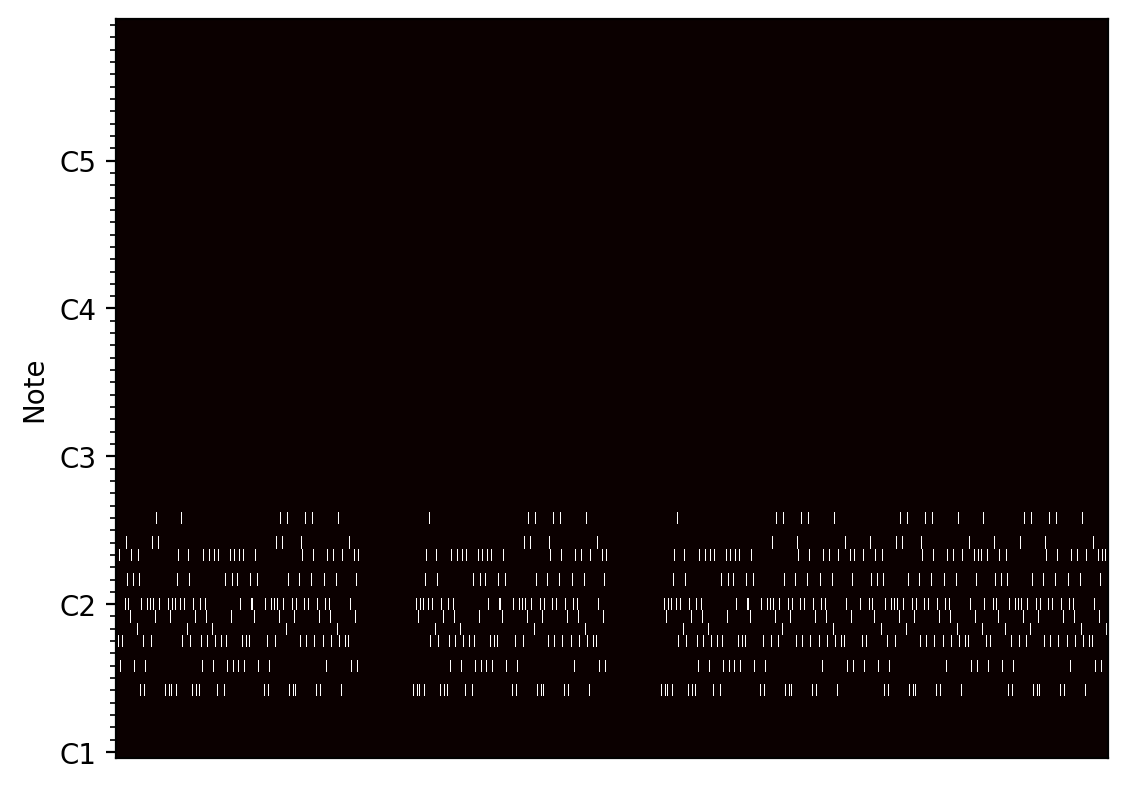

In [ ]:
rolls = pd.read_csv("piano_rolls.csv", sep=';', index_col=['piano_roll_name', 'timestep'])
print(rolls.head())
print(rolls.index.levels[0])
#rolls = padster(rolls)
first = rolls.loc['Escape_Pina_Colada_Song_.mid_0:9'].T
display.specshow(first.values, y_axis='cqt_note', cmap=plt.cm.hot)

In [ ]:
rolls = rolls.loc[:, (rolls != 0).any(axis=0)]
rolls.tail(n=16)

C3  C#3  D3  D#3  E3  F3  F#3  G3  G#3  A3  \
piano_roll_name         timestep                                               
Stupid_Girl.2.mid_876:5 750        0    0   0    0   0   0    0   0    0   0   
                        751        0    0   0    0   0   0    0   0    0   0   
                        752        0    0   0    0   0   0    0   0    0   0   
                        753        0    0   0    0   0   0    0   0    0   0   
                        754        0    0   0    0   0   0    0   0    0   0   
                        755        0    0   0    0   0   0    0   0    0   0   
                        756        0    0   0    0   0   0    0   0    0   0   
                        757        0    0   0    0   0   0    0   0    0   0   
                        758        0    0   0    0   0   0    0   0    0   0   
                        759        0    0   0    0   0   0    0   0    0   0   
                        760        0    0   0    0   0   0    0   0    0   0   
                        761        0    0   0    0   0   0    0   0    0   0   
                        762        0    0   0    0   0   0    0   0    0   0   
                        763        0    0   0    0   0   0    0   0    0   0   
                        764        0    0   0    0   0   0    0   0    0   0   
                        765        0    0   0    0   0   0    0   0    0   0   

                                  ...  D7  D#7  E7  F7  F#7  G7  G#7  A7  A#7  \
piano_roll_name         timestep  ...                                           
Stupid_Girl.2.mid_876:5 750       ...   0    0   0   0    0   0    0   0    0   
                        751       ...   0    0   0   0    0   0    0   0    0   
                        752       ...   0    0   0   0    0   0    0   0    0   
                        753       ...   0    0   0   0    0   0    0   0    0   
                        754       ...   0    0   0   0    0   0    0   0    0   
                        755       ...   0    0   0   0    0   0    0   0    0   
                        756       ...   0    0   0   0    0   0    0   0    0   
                        757       ...   0    0   0   0    0   0    0   0    0   
                        758       ...   0    0   0   0    0   0    0   0    0   
                        759       ...   0    0   0   0    0   0    0   0    0   
                        760       ...   0    0   0   0    0   0    0   0    0   
                        761       ...   0    0   0   0    0   0    0   0    0   
                        762       ...   0    0   0   0    0   0    0   0    0   
                        763       ...   0    0   0   0    0   0    0   0    0   
                        764       ...   0    0   0   0    0   0    0   0    0   
                        765       ...   0    0   0   0    0   0    0   0    0   

                                  B7  
piano_roll_name         timestep      
Stupid_Girl.2.mid_876:5 750        0  
                        751        0  
                        752        0  
                        753        0  
                        754        0  
                        755        0  
                        756        0  
                        757        0  
                        758        0  
                        759        0  
                        760        0  
                        761        0  
                        762        0  
                        763        0  
                        764        0  
                        765        0  

[16 rows x 60 columns]

# Step 5: Main VAE Model

In [ ]:
# prompt: import google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pretty-midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.1 MB/s eta 0:00:00
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=25d2e56fb624e48587b2f295459c8e0c82be4ace87dad98452a45b12576b445f
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty-midi


In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/Variational-Autoencoder/MusicVAE.git

Cloning into 'MusicVAE'...
remote: Enumerating objects: 338, done.
remote: Total 338 (delta 0), reused 0 (delta 0), pack-reused 338 (from 1)
Receiving objects: 100% (338/338), 349.55 KiB | 1.10 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:

!cp /content/drive/MyDrive/piano_rolls.csv ./piano_rolls1.csv

In [ ]:
!cp -r MusicVAE/src/ ./src/

In [ ]:
# dftemp=pd.read_csv('piano_rolls1.csv', sep=';')
# df2temp=dftemp[0:9167]
# pd.DataFrame.to_csv(df2temp,'piano_rolls_10000.csv', sep=';')

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade torch
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 305.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import pretty_midi
from torch.nn.functional import softplus

#DATA IMPORTING LIBRARIES
# Add the src folder to the path
# import sys
# sys.path.insert(0, '/content/src/')

from torch.utils.data import DataLoader, random_split

from src.data.dataloader import MidiDataset
from src.data.bar_transform import BarTransform
from torch.utils.data import Dataset, DataLoader

from torch.utils.data.sampler import SubsetRandomSampler



#half of this is not yet needed but maybe it will be to visualize the latent space
import matplotlib.pyplot as plt
from IPython.display import Image, Audio, display, clear_output
import numpy as np
from sklearn.decomposition import PCA
%matplotlib nbagg
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.dark_palette("purple"))



from src.midi_builder import MidiBuilder
builder = MidiBuilder()


cuda = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


NOTESPERBAR=16 #total notes in one bar

totalbars=16 #total bars as input
NUM_PITCHES=60+1 # all possible notes to play +1 for silences

TOTAL_NOTES=NOTESPERBAR*totalbars

num_features=NUM_PITCHES #size of input feature vector

batch_size = 16 #actual batchsize

TEACHER_FORCING=True #not used but it will be needed


In [ ]:
transform = BarTransform(bars=totalbars, note_count=NUM_PITCHES)#configures number of input bars

midi_dataset = MidiDataset(csv_file='./piano_rolls1.csv', transform = transform) #imports dataset

midi_dataset.get_mem_usage()

random_seed = 42

test_split = .2
shuffle = True

if random_seed is not None:
    np.random.seed(random_seed)

dataset_size = len(midi_dataset)           #number of musics on dataset
test_size = int(test_split * dataset_size) #test size length
train_size = dataset_size - test_size      #train data length

train_dataset, test_dataset = random_split(midi_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, shuffle=shuffle, batch_size=batch_size, num_workers=4)#, sampler=train_sampler)
test_loader = DataLoader(test_dataset, shuffle=shuffle, batch_size=batch_size, num_workers=4)#, sampler=test_sampler)

print("Train size: {}, Test size: {}".format(train_size, test_size))

Train size: 8668, Test size: 2167


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# # define size variables
# input_size = NUM_PITCHES

# enc_hidden_size=256 #hidden size of encoder
# conductor_hidden_size=256 #hidden size of decoder

# decoders_hidden_size=64 #hidden size of decoder
# decoders_initial_size=32 #decoder input size

# n_layers_conductor=2 #not being used rn cuz number of layers is incorrect
# n_layers_decoder=3 #not being used rn cuz number of layers is incorrect

# latent_features=64 #latent space dimension

# sequence_length = 16 #notes per decoder

# dropout_rate = 0.2

# class VariationalAutoencoder(nn.Module):
#     def __init__(self, latent_features,teacher_forcing, eps_i):
#         super(VariationalAutoencoder, self).__init__()

#         self.teacher_forcing = teacher_forcing
#         self.eps_i = eps_i

#         self.latent_features = latent_features

#         #data goes into bidirectional encoder
#         self.encoder = torch.nn.LSTM(
#                 batch_first = True,
#                 input_size = input_size,
#                 hidden_size = enc_hidden_size,
#                 num_layers = 1,
#                 bidirectional = True)

#         #encoded data goes onto connect linear layer. inputs must be*2 because LSTM is bidirectional
#         #output must be 2*latentspace because it needs to be split into miu and sigma right after.
#         self.encoderOut = nn.Linear(in_features=enc_hidden_size*2, out_features=latent_features*2)

#         #after being converted data goes through a fully connected layer
#         self.linear_z = nn.Linear(in_features=latent_features, out_features=decoders_initial_size)

#         self.dropout= nn.Dropout(p=dropout_rate)

#         self.worddropout = nn.Dropout2d(p=dropout_rate)

#         # Define the conductor and note decoder
#         self.conductor = nn.LSTM(decoders_initial_size, decoders_initial_size, num_layers=1,batch_first=True)
#         self.decoder = nn.LSTM(NUM_PITCHES+decoders_initial_size, decoders_initial_size, num_layers=1,batch_first=True)

#         # Linear note to note type (classes/pitches)
#         self.linear = nn.Linear(decoders_initial_size, NUM_PITCHES)


#     #used to initialize the hidden layer of the encoder to zero before every batch
#     def init_hidden(self, batch_size):
#         #must be 2 x batch x hidden_size because its a bi-directional LSTM
#         init = torch.zeros(2, batch_size, enc_hidden_size, device=device)
#         c0 = torch.zeros(2, batch_size, enc_hidden_size, device=device)

#         #2 because has 2 layers
#         #n_layers_conductor
#         init_conductor = torch.zeros(1, batch_size, decoders_initial_size, device=device)
#         c_condunctor = torch.zeros(1, batch_size, decoders_initial_size, device=device)

#         return init,c0,init_conductor,c_condunctor

#     # Coin toss to determine whether to use teacher forcing on a note(Scheduled sampling)
#     # Will always be True for eps_i = 1.
#     def use_teacher_forcing(self):
#         with torch.no_grad():
#             tf = np.random.rand(1)[0] <= self.eps_i
#         return tf

#     def set_scheduled_sampling(self, eps_i):
#         self.eps_i = eps_i

#     def forward(self, x):
#         batch_size = x.size(0)

#         note = torch.zeros(batch_size, 1 , NUM_PITCHES,device=device)

#         the_input = torch.cat([note,x],dim=1)

#         outputs = {}

#         #creates hidden layer values
#         h0,c0,hconductor,cconductor = self.init_hidden(batch_size)

#         x = self.worddropout(x)

#         #resets encoder at the beginning of every batch and gives it x
#         x, hidden = self.encoder(x, ( h0,c0))

#         #x=self.dropout(x)

#         #goes from 4096 to 1024
#         x = self.encoderOut(x)

#         #x=self.dropout(x)

#         # Split encoder outputs into a mean and variance vector
#         mu, log_var = torch.chunk(x, 2, dim=-1)

#         # Make sure that the log variance is positive
#         log_var = softplus(log_var)

#         # :- Reparametrisation trick
#         # a sample from N(mu, sigma) is mu + sigma * epsilon
#         # where epsilon ~ N(0, 1)

#         # Don't propagate gradients through randomness
#         with torch.no_grad():
#             batch_size = mu.size(0)
#             epsilon = torch.randn(batch_size, 1, self.latent_features)

#             if cuda:
#                 epsilon = epsilon.cuda()

#         #setting sigma
#         sigma = torch.exp(log_var*2)

#         #generate z - latent space
#         z = mu + epsilon * sigma

#         #decrese space
#         z = self.linear_z(z)

#         #z=self.dropout(z)

#         #make dimensions fit (NOT SURE IF THIS IS ENTIRELY CORRECT)
#         #z = z.permute(1,0,2)

#         #DECODER ##############

#         conductor_hidden = (hconductor,cconductor)

#         counter=0

#         notes = torch.zeros(batch_size,TOTAL_NOTES,NUM_PITCHES,device=device)

#         # For the first timestep the note is the embedding
#         note = torch.zeros(batch_size, 1 , NUM_PITCHES,device=device)

#         # Go through each element in the latent sequence
#         for i in range(16):
#             embedding, conductor_hidden = self.conductor(z[:,i,:].view(batch_size,1, -1), conductor_hidden)

#             if self.use_teacher_forcing():

#                  # Reset the decoder state of each 16 bar sequence
#                 decoder_hidden = (torch.randn(1,batch_size, decoders_initial_size,device=device), torch.randn(1,batch_size, decoders_initial_size,device=device))

#                 embedding = embedding.expand(batch_size, NOTESPERBAR, embedding.shape[2])

#                 e = torch.cat([embedding,the_input[:,range(i*16,i*16+16),:]],dim=-1)

#                 notes2, decoder_hidden = self.decoder(e, decoder_hidden)

#                 aux = self.linear(notes2)
#                 aux = torch.softmax(aux, dim=2);

#                 #generates 16 notes per batch at a time
#                 notes[:,range(i*16,i*16+16),:]=aux;
#             else:
#                  # Reset the decoder state of each 16 bar sequence
#                 decoder_hidden = (torch.randn(1,batch_size, decoders_initial_size,device=device), torch.randn(1,batch_size, decoders_initial_size,device=device))

#                 for _ in range(sequence_length):
#                     # Concat embedding with previous note

#                     e = torch.cat([embedding, note], dim=-1)
#                     e = e.view(batch_size, 1, -1)

#                     # Generate a single note (for each batch)
#                     note, decoder_hidden = self.decoder(e, decoder_hidden)

#                     aux = self.linear(note)
#                     aux = torch.softmax(aux, dim=2);

#                     notes[:,counter,:]=aux.squeeze();

#                     note=aux

#                     counter=counter+1


#         outputs["x_hat"] = notes
#         outputs["z"] = z
#         outputs["mu"] = mu
#         outputs["log_var"] = log_var

#         return outputs

# net = VariationalAutoencoder(latent_features, TEACHER_FORCING, eps_i = 1)

# # Transfer model to GPU if available
# if cuda:
#     net = net.cuda()

# print(net)

In [ ]:
#Define size variables
input_size = NUM_PITCHES

enc_hidden_size = 512  # Increased from 256
conductor_hidden_size = 512  # Increased from 256

decoders_hidden_size = 128  # Increased from 64
decoders_initial_size = 64  # Increased from 32

n_layers_conductor = 2  # Now being used
n_layers_decoder = 3  # Now being used

latent_features = 128  # Increased from 64

sequence_length = 16  # Notes per decoder

dropout_rate = 0.1  # Decreased from 0.2

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_features, teacher_forcing, eps_i):
        super(VariationalAutoencoder, self).__init__()

        self.teacher_forcing = teacher_forcing
        self.eps_i = eps_i

        self.latent_features = latent_features

        # Data goes into bidirectional encoder
        self.encoder = torch.nn.LSTM(
            batch_first=True,
            input_size=input_size,
            hidden_size=enc_hidden_size,
            num_layers=2,  # Increased from 1
            bidirectional=True
        )

        # Encoded data goes onto connect linear layer. Inputs must be *2 because LSTM is bidirectional
        # Output must be 2*latent space because it needs to be split into mu and sigma right after.
        self.encoderOut = nn.Linear(in_features=enc_hidden_size*2, out_features=latent_features*2)

        # After being converted data goes through a fully connected layer
        self.linear_z = nn.Linear(in_features=latent_features, out_features=decoders_initial_size)

        self.dropout = nn.Dropout(p=dropout_rate)

        # Define the conductor and note decoder
        self.conductor = nn.LSTM(decoders_initial_size, decoders_initial_size, num_layers=n_layers_conductor, batch_first=True)
        self.decoder = nn.LSTM(NUM_PITCHES+decoders_initial_size, decoders_hidden_size, num_layers=n_layers_decoder, batch_first=True)

        # Linear note to note type (classes/pitches)
        self.linear = nn.Linear(decoders_hidden_size, NUM_PITCHES)

    # Used to initialize the hidden layer of the encoder to zero before every batch
    def init_hidden(self, batch_size):
        # Must be 4 x batch x hidden_size because it's a bi-directional LSTM with 2 layers
        init = torch.zeros(4, batch_size, enc_hidden_size, device=device)
        c0 = torch.zeros(4, batch_size, enc_hidden_size, device=device)

        # For the conductor LSTM
        init_conductor = torch.zeros(n_layers_conductor, batch_size, decoders_initial_size, device=device)
        c_conductor = torch.zeros(n_layers_conductor, batch_size, decoders_initial_size, device=device)

        return init, c0, init_conductor, c_conductor

    def set_scheduled_sampling(self, eps_i):
        self.eps_i = eps_i

    def use_teacher_forcing(self):
      with torch.no_grad():
          tf = np.random.rand(1)[0] <= self.eps_i
      return tf

    def forward(self, x):
        batch_size = x.size(0)

        note = torch.zeros(batch_size, 1, NUM_PITCHES, device=device)

        the_input = torch.cat([note, x], dim=1)

        outputs = {}

        # Creates hidden layer values
        h0, c0, hconductor, cconductor = self.init_hidden(batch_size)

        x = self.dropout(x)  # Apply dropout

        # Resets encoder at the beginning of every batch and gives it x
        x, hidden = self.encoder(x, (h0, c0))

        # x = self.dropout(x)

        # Goes from 4096 to 1024
        x = self.encoderOut(x)

        # x = self.dropout(x)

        # Split encoder outputs into a mean and variance vector
        mu, log_var = torch.chunk(x, 2, dim=-1)

        # Make sure that the log variance is positive
        log_var = softplus(log_var)

        # :- Reparametrisation trick
        # A sample from N(mu, sigma) is mu + sigma * epsilon
        # Where epsilon ~ N(0, 1)

        # Don't propagate gradients through randomness
        with torch.no_grad():
            batch_size = mu.size(0)
            epsilon = torch.randn(batch_size, 1, self.latent_features)

            if cuda:
                epsilon = epsilon.cuda()

        # Setting sigma
        sigma = torch.exp(log_var * 0.5)  # Corrected exponent

        # Generate z - latent space
        z = mu + epsilon * sigma

        # Decrease space
        z = self.linear_z(z)

        # z = self.dropout(z)

        # Make dimensions fit (NOT SURE IF THIS IS ENTIRELY CORRECT)
        # z = z.permute(1, 0, 2)

        # DECODER ##############

        conductor_hidden = (hconductor, cconductor)

        counter = 0

        notes = torch.zeros(batch_size, TOTAL_NOTES, NUM_PITCHES, device=device)

        # For the first timestep the note is the embedding
        note = torch.zeros(batch_size, 1, NUM_PITCHES, device=device)

        # Go through each element in the latent sequence
        for i in range(16):
            embedding, conductor_hidden = self.conductor(z[:, i, :].view(batch_size, 1, -1), conductor_hidden)

            if self.use_teacher_forcing():
                # Reset the decoder state of each 16 bar sequence
                decoder_hidden = (torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device),
                                  torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device))

                embedding = embedding.expand(batch_size, NOTESPERBAR, embedding.shape[2])

                e = torch.cat([embedding, the_input[:, range(i * 16, i * 16 + 16), :]], dim=-1)

                notes2, decoder_hidden = self.decoder(e, decoder_hidden)

                aux = self.linear(notes2)
                aux = torch.softmax(aux, dim=2);

                # Generates 16 notes per batch at a time
                notes[:, range(i * 16, i * 16 + 16), :] = aux;
            else:
                # Reset the decoder state of each 16 bar sequence
                decoder_hidden = (torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device),
                                  torch.randn(n_layers_decoder, batch_size, decoders_hidden_size, device=device))

                for _ in range(sequence_length):
                    # Concat embedding with previous note

                    e = torch.cat([embedding, note], dim=-1)
                    e = e.view(batch_size, 1, -1)

                    # Generate a single note (for each batch)
                    note, decoder_hidden = self.decoder(e, decoder_hidden)

                    aux = self.linear(note)
                    aux = torch.softmax(aux, dim=2);

                    notes[:, counter, :] = aux.squeeze();

                    note = aux

                    counter = counter + 1

        outputs["x_hat"] = notes
        outputs["z"] = z
        outputs["mu"] = mu
        outputs["log_var"] = log_var

        return outputs


net = VariationalAutoencoder(latent_features, TEACHER_FORCING, eps_i=1)

# Transfer model to GPU if available
if cuda:
    net = net.cuda()

print(net)


VariationalAutoencoder(
  (encoder): LSTM(61, 512, num_layers=2, batch_first=True, bidirectional=True)
  (encoderOut): Linear(in_features=1024, out_features=256, bias=True)
  (linear_z): Linear(in_features=128, out_features=64, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (conductor): LSTM(64, 64, num_layers=2, batch_first=True)
  (decoder): LSTM(125, 128, num_layers=3, batch_first=True)
  (linear): Linear(in_features=128, out_features=61, bias=True)
)


In [ ]:
# Calculate the number of parameters in the model
num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {num_params}")

# Total number of parameters (including non-trainable ones)
total_params = sum(p.numel() for p in net.parameters())
print(f"Total number of parameters: {total_params}")


Number of trainable parameters: 9394685
Total number of parameters: 9394685


In [ ]:
#directly taken from notebook, probably some adaptation might be needed

from torch.nn.functional import binary_cross_entropy
from torch import optim
from torch.distributions.normal import Normal
from torch.distributions.kl import kl_divergence


def ELBO_loss(y, t, mu, log_var, weight):
    # Reconstruction error, log[p(x|z)]
    # Sum over features
    likelihood = -binary_cross_entropy(y, t, reduction="none")
    likelihood = likelihood.view(likelihood.size(0), -1).sum(1)

    # Regularization error:
    # Kulback-Leibler divergence between approximate posterior, q(z|x)
    # and prior p(z) = N(z | mu, sigma*I).
    sigma = torch.exp(log_var*2)
    n_mu = torch.Tensor([0])
    n_sigma = torch.Tensor([1])
    if cuda:
        n_mu = n_mu.cuda()
        n_sigma = n_sigma.cuda()

    p = Normal(n_mu, n_sigma)
    q = Normal(mu, sigma)

    #The method signature is P and Q, but might need to be reversed to calculate divergence of Q with respect to P
    kl_div = kl_divergence(q, p)

    # In the case of the KL-divergence between diagonal covariance Gaussian and
    # a standard Gaussian, an analytic solution exists. Using this excerts a lower
    # variance estimator of KL(q||p)
    #kl = -weight * torch.sum(1 + log_var - mu**2 - torch.exp(log_var), dim=(1,2))

    # Combining the two terms in the evidence lower bound objective (ELBO)
    # mean over batch
    ELBO = torch.mean(likelihood) - (weight*torch.mean(kl_div)) # add a weight to the kl using warmup

    # notice minus sign as we want to maximise ELBO
    return -ELBO, kl_div.mean(),weight*kl_div.mean() # mean instead of sum



# define our optimizer
# The Adam optimizer works really well with VAEs.
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = ELBO_loss

In [ ]:
from torch.autograd import Variable

#setting dummy data
#Generating dummy data
a= np.random.randint(NUM_PITCHES, size=TOTAL_NOTES)
data = np.zeros((TOTAL_NOTES, NUM_PITCHES))
data[np.arange(TOTAL_NOTES), a] = 1 #generating dummy data

a= np.random.randint(NUM_PITCHES, size=TOTAL_NOTES)
data1 = np.zeros((TOTAL_NOTES, NUM_PITCHES))
data1[np.arange(TOTAL_NOTES), a] = 1 #generating dummy data
d=np.zeros((2,TOTAL_NOTES, NUM_PITCHES))
d[0]=data
d[1]=data1

print(d.shape)

#adding 1 dimension, 1x32x4
x = d#data[np.newaxis, :, :]



#setting input ans tensor variable
x = Variable(torch.Tensor(x))

if cuda:
    x = x.cuda()



#running forward pass
outputs = net(x)


#AFTER THIS NOTHING IS DONE YET ------
x_hat = outputs["x_hat"]
mu, log_var = outputs["mu"], outputs["log_var"]
z = outputs["z"]

loss, kl,klw = loss_function(x_hat, x, mu, log_var,1)



print(x.shape)
print(x_hat.shape)
print(z.shape)
print(loss)
print(kl)

(2, 256, 61)
torch.Size([2, 256, 61])
torch.Size([2, 256, 61])
torch.Size([2, 256, 64])
tensor(1313.0344, device='cuda:0', grad_fn=<NegBackward0>)
tensor(6.1149, device='cuda:0', grad_fn=<MeanBackward0>)


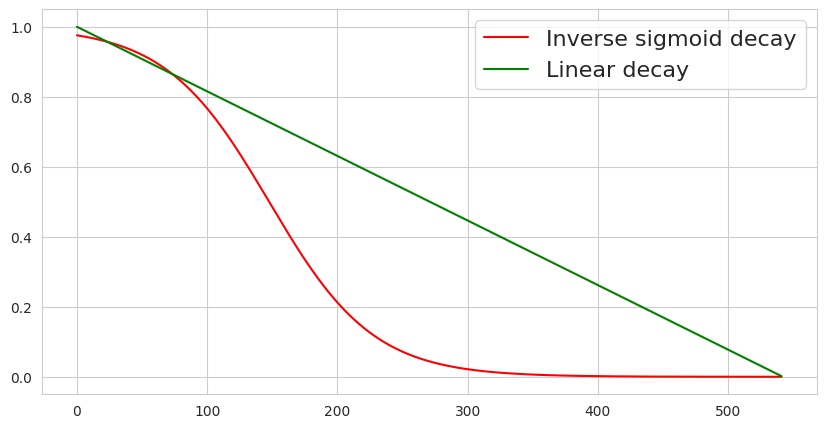

In [ ]:
scheduled_decay_rate = 40

def lin_decay(i, mineps=0):
    return np.max([mineps, 1 - (1/len(train_loader))*i])

def inv_sigmoid_decay(i, rate=40):
    return rate/(rate + np.exp(i/rate))

eps = []
for i in range(len(train_loader)):
    eps_i = inv_sigmoid_decay(i, rate=scheduled_decay_rate)
    eps.append(eps_i)


eps2 = []
for i in range(len(train_loader)):
    eps_i = lin_decay(i, 0)
    eps2.append(eps_i)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(eps, color="red")
ax.plot(eps2, color="green")
ax.legend(['Inverse sigmoid decay', 'Linear decay'], prop={'size': 16})

Estimated time until completion: 6.67 hours / 400.00 minutes/ 24000.00 seconds


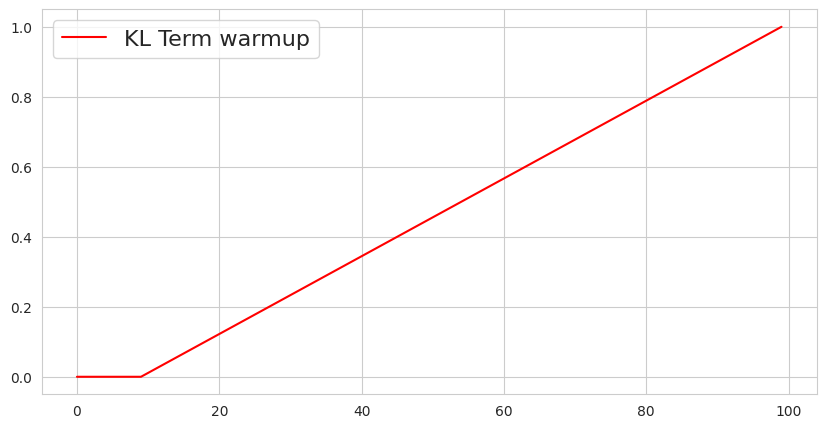

In [ ]:
# 3 = ~12 minutes
#num_epochs = 200
#warmup_epochs= 90
#pre_warmup_epochs = 10
num_epochs = 100
warmup_epochs= 90
pre_warmup_epochs = 10

warmup_lerp = 1/warmup_epochs

if warmup_epochs > num_epochs - pre_warmup_epochs:
    warmup_epochs=num_epochs - pre_warmup_epochs


# Plot how the warmup looks
kl_w = 0
kls = []
for e in range(num_epochs):
    if e >= pre_warmup_epochs:
        kl_w = kl_w + warmup_lerp
        if kl_w > 1:
            kl_w=1.

    kls.append(kl_w)

f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(kls, color="red")
ax.legend(['KL Term warmup'], prop={'size': 16})

est_time = 4*num_epochs
print("Estimated time until completion: {:.2f} hours / {:.2f} minutes/ {:.2f} seconds".format(est_time/60, est_time, est_time*60))

In [ ]:
# # from torch.autograd import Variable
# import time
# import os
# import math
# tmp_img = "tmp_vae_out.png"

# warmup_w=0

# eps_i = 1
# use_scheduled_sampling = False

# train_loss, valid_loss = [], []
# train_kl, valid_kl,train_klw = [], [],[]

# start = time.time()

# print("Training epoch {}".format(0))
# #epochs loop
# for epoch in range(num_epochs):

#     batch_loss, batch_kl,batch_klw = [], [],[]
#     net.train()

#     for i_batch, sample_batched in enumerate(train_loader):
#         #if i_batch == 10:
#         #    break
#         x = sample_batched['piano_rolls']

#         x = x.type('torch.FloatTensor')

#         #if i_batch%10==0:
#         #    print("batch:",i_batch)

#         x = Variable(x)

#         # This is an alternative way of putting
#         # a tensor on the GPU
#         device="cuda"
#         x = x.to(device)

#         ## Calc the sched sampling rate:
#         if epoch >= pre_warmup_epochs and use_scheduled_sampling:
#             eps_i = inv_sigmoid_decay(i_batch, rate=scheduled_decay_rate)

#         net.set_scheduled_sampling(eps_i)

#         outputs = net(x)
#         x_hat = outputs['x_hat']
#         mu, log_var = outputs['mu'], outputs['log_var']

#         elbo, kl,kl_w = loss_function(x_hat, x, mu, log_var, warmup_w)

#         optimizer.zero_grad()
#         elbo.backward()
#         optimizer.step()

#         batch_loss.append(elbo.item())
#         batch_kl.append(kl.item())
#         batch_klw.append(kl_w.item())
#     train_loss.append(np.mean(batch_loss))
#     train_kl.append(np.mean(batch_kl))
#     train_klw.append(np.mean(batch_klw))

#     # Evaluate, do not propagate gradients
#     with torch.no_grad():
#         net.eval()

#         # Just load a single batch from the test loader
#         x = next(iter(test_loader))
#         x = Variable(x['piano_rolls'].type('torch.FloatTensor'))

#         x = x.to(device)

#         net.set_scheduled_sampling(1.) # Please use teacher forcing for validations
#         outputs = net(x)
#         x_hat = outputs['x_hat']
#         mu, log_var = outputs['mu'], outputs['log_var']
#         z = outputs["z"]

#         elbo, kl,klw = loss_function(x_hat, x, mu, log_var, warmup_w)

#         # We save the latent variable and reconstruction for later use
#         # we will need them on the CPU to plot
#         x = x.to("cpu")
#         x_hat = x_hat.to("cpu")
#         z = z.detach().to("cpu").numpy()

#         valid_loss.append(elbo.item())
#         valid_kl.append(kl.item())

#     if epoch >= pre_warmup_epochs:
#         warmup_w = warmup_w + warmup_lerp
#         if warmup_w > 1:
#             warmup_w=1.

#     if epoch == 0:
#         continue

#     # -- Plotting --
#     f, axarr = plt.subplots(2, 1, figsize=(10, 10))


#     # Loss
#     ax = axarr[0]
#     ax.set_title("ELBO")
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('Error')

#     ax.plot(np.arange(epoch+1), train_loss, color="black")
#     ax.plot(np.arange(epoch+1), valid_loss, color="gray", linestyle="--")
#     ax.legend(['Training', 'Validation'])


#     # KL / reconstruction
#     ax = axarr[1]

#     ax.set_title("Kullback-Leibler Divergence")
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('KL divergence')


#     ax.plot(np.arange(epoch+1), train_kl, color="black")
#     ax.plot(np.arange(epoch+1), valid_kl, color="gray", linestyle="--")
#     ax.plot(np.arange(epoch+1), train_klw, color="blue", linestyle="--")
#     ax.legend(['Training', 'Validation','Weighted'])

#     print("Epoch: {}, {} seconds elapsed".format(epoch, time.time() - start))

#     plt.savefig(tmp_img)
#     plt.close(f)
#     display(Image(filename=tmp_img))

#     clear_output(wait=True)

#     os.remove(tmp_img)

# end_time = time.time() - start
# print("Finished. Time elapsed: {} seconds".format(end_time))

In [ ]:
# '''

# Temp train function for limited samples
# '''

# max_batches=10

# # from torch.autograd import Variable
# import time
# import os
# import math
# tmp_img = "tmp_vae_out.png"

# warmup_w=0

# eps_i = 1
# use_scheduled_sampling = False

# train_loss, valid_loss = [], []
# train_kl, valid_kl,train_klw = [], [],[]

# start = time.time()

# print("Training epoch {}".format(0))
# #epochs loop
# for epoch in range(num_epochs):

#     batch_loss, batch_kl,batch_klw = [], [],[]
#     net.train()

#     for i_batch, sample_batched in enumerate(train_loader):

#         if i_batch >= max_batches:  # Stop after processing ~10,000 rows
#             break
#         #if i_batch == 10:
#         #    break
#         x = sample_batched['piano_rolls']

#         x = x.type('torch.FloatTensor')

#         #if i_batch%10==0:
#         #    print("batch:",i_batch)

#         x = Variable(x)

#         # This is an alternative way of putting
#         # a tensor on the GPU
#         device="cuda"
#         x = x.to(device)

#         ## Calc the sched sampling rate:
#         if epoch >= pre_warmup_epochs and use_scheduled_sampling:
#             eps_i = inv_sigmoid_decay(i_batch, rate=scheduled_decay_rate)

#         net.set_scheduled_sampling(eps_i)

#         outputs = net(x)
#         x_hat = outputs['x_hat']
#         mu, log_var = outputs['mu'], outputs['log_var']

#         elbo, kl,kl_w = loss_function(x_hat, x, mu, log_var, warmup_w)

#         optimizer.zero_grad()
#         elbo.backward()
#         optimizer.step()

#         batch_loss.append(elbo.item())
#         batch_kl.append(kl.item())
#         batch_klw.append(kl_w.item())
#     train_loss.append(np.mean(batch_loss))
#     train_kl.append(np.mean(batch_kl))
#     train_klw.append(np.mean(batch_klw))

#     # Evaluate, do not propagate gradients
#     with torch.no_grad():
#         net.eval()

#         # Just load a single batch from the test loader
#         x = next(iter(test_loader))
#         x = Variable(x['piano_rolls'].type('torch.FloatTensor'))

#         x = x.to(device)

#         net.set_scheduled_sampling(1.) # Please use teacher forcing for validations
#         outputs = net(x)
#         x_hat = outputs['x_hat']
#         mu, log_var = outputs['mu'], outputs['log_var']
#         z = outputs["z"]

#         elbo, kl,klw = loss_function(x_hat, x, mu, log_var, warmup_w)

#         # We save the latent variable and reconstruction for later use
#         # we will need them on the CPU to plot
#         x = x.to("cpu")
#         x_hat = x_hat.to("cpu")
#         z = z.detach().to("cpu").numpy()

#         valid_loss.append(elbo.item())
#         valid_kl.append(kl.item())

#     if epoch >= pre_warmup_epochs:
#         warmup_w = warmup_w + warmup_lerp
#         if warmup_w > 1:
#             warmup_w=1.

#     if epoch == 0:
#         continue

#     # -- Plotting --
#     f, axarr = plt.subplots(2, 1, figsize=(10, 10))


#     # Loss
#     ax = axarr[0]
#     ax.set_title("ELBO")
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('Error')

#     ax.plot(np.arange(epoch+1), train_loss, color="black")
#     ax.plot(np.arange(epoch+1), valid_loss, color="gray", linestyle="--")
#     ax.legend(['Training', 'Validation'])


#     # KL / reconstruction
#     ax = axarr[1]

#     ax.set_title("Kullback-Leibler Divergence")
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel('KL divergence')


#     ax.plot(np.arange(epoch+1), train_kl, color="black")
#     ax.plot(np.arange(epoch+1), valid_kl, color="gray", linestyle="--")
#     ax.plot(np.arange(epoch+1), train_klw, color="blue", linestyle="--")
#     ax.legend(['Training', 'Validation','Weighted'])

#     print("Epoch: {}, {} seconds elapsed".format(epoch, time.time() - start))

#     plt.savefig(tmp_img)
#     plt.close(f)
#     display(Image(filename=tmp_img))

#     clear_output(wait=True)

#     os.remove(tmp_img)

# end_time = time.time() - start
# print("Finished. Time elapsed: {} seconds".format(end_time))

Loading previous training state...
Resuming from epoch 32 with warmup weight 0.24444444444444433
Starting training from epoch 32


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch: 32, Time elapsed: 902.42 seconds
Train Loss: 338.770492, Valid Loss: 243.455551
Train KL: 0.300460, Valid KL: 0.072862
--------------------------------------------------


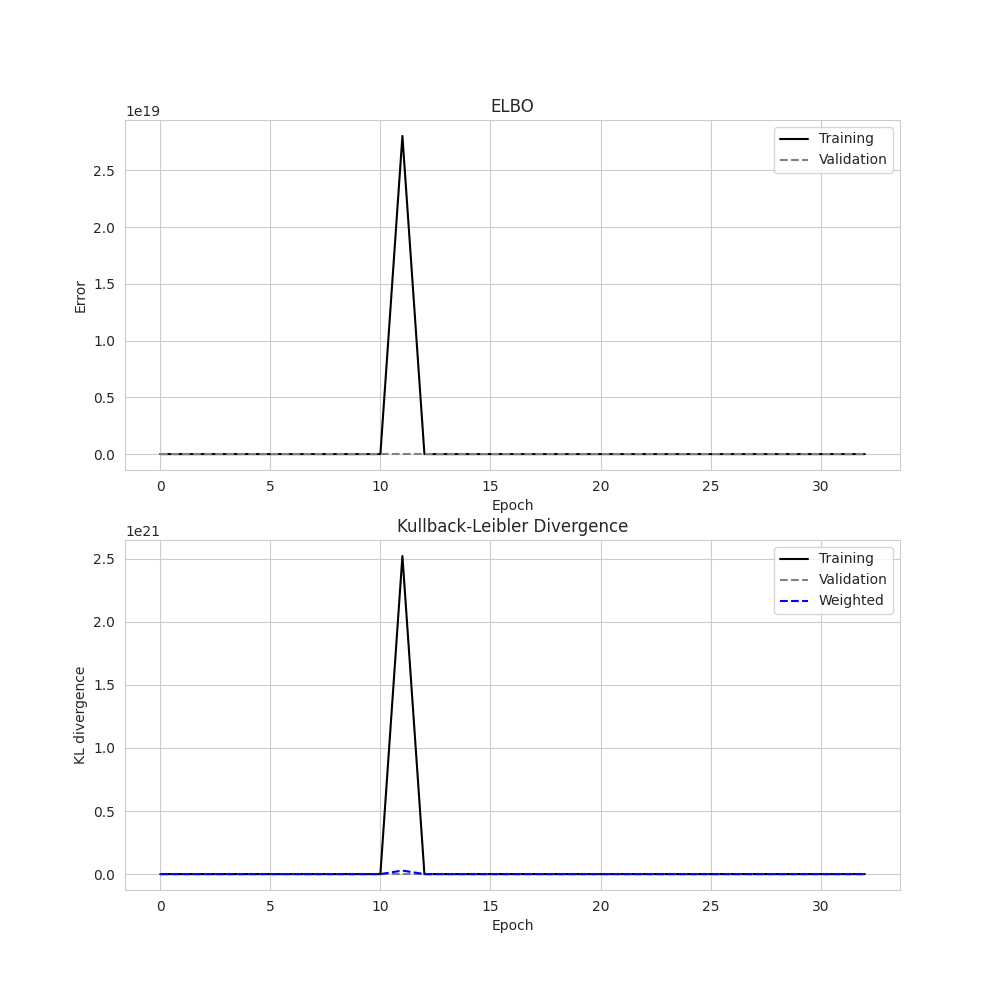

In [ ]:
'''
TRAIN ATTEMPT 3
'''
max_batches=500# change to 500 for training

import time
import os
import math
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display, clear_output

# Create save directory if it doesn't exist
save_dir = '/content/drive/MyDrive/musicmaking/'
os.makedirs(save_dir, exist_ok=True)

tmp_img = "tmp_vae_out.png"
all_losses_img = "all_losses.png"

# File paths for saving models
model_path = os.path.join(save_dir, 'latestmusic.pth')
encoder_path = os.path.join(save_dir, 'latestencoder.pth')
decoder_path = os.path.join(save_dir, 'latestdecoder.pth')

# Check if we're resuming training
start_epoch = 0
warmup_w = 0
eps_i = 1
use_scheduled_sampling = False

train_loss, valid_loss = [], []
train_kl, valid_kl, train_klw = [], [], []

# Load previous training state if exists
if os.path.exists(model_path):
    print("Loading previous training state...")
    checkpoint = torch.load(model_path, map_location=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'), weights_only=False)
    net.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    warmup_w = checkpoint['warmup_w']
    train_loss = checkpoint['train_loss']
    valid_loss = checkpoint['valid_loss']
    train_kl = checkpoint['train_kl']
    valid_kl = checkpoint['valid_kl']
    train_klw = checkpoint['train_klw']
    print(f"Resuming from epoch {start_epoch} with warmup weight {warmup_w}")


start = time.time()
print(f"Starting training from epoch {start_epoch}")

# Function to save all losses to a persistent image
def save_all_losses():
    if len(train_loss) == 0:
        return

    f, axarr = plt.subplots(2, 1, figsize=(10, 10))

    # Loss
    ax = axarr[0]
    ax.set_title("ELBO")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Error')
    epochs = np.arange(len(train_loss))
    ax.plot(epochs, train_loss, color="black")
    ax.plot(epochs, valid_loss, color="gray", linestyle="--")
    ax.legend(['Training', 'Validation'])

    # KL / reconstruction
    ax = axarr[1]
    ax.set_title("Kullback-Leibler Divergence")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('KL divergence')
    ax.plot(epochs, train_kl, color="black")
    ax.plot(epochs, valid_kl, color="gray", linestyle="--")
    ax.plot(epochs, train_klw, color="blue", linestyle="--")
    ax.legend(['Training', 'Validation', 'Weighted'])

    plt.savefig(os.path.join(save_dir, all_losses_img))
    plt.close(f)

# Training loop
for epoch in range(start_epoch, num_epochs):
    batch_loss, batch_kl, batch_klw = [], [], []
    net.train()

    for i_batch, sample_batched in enumerate(train_loader):
        if i_batch >= max_batches:  # Stop after processing limited rows
            break

        x = sample_batched['piano_rolls']
        x = x.type('torch.FloatTensor')
        x = Variable(x)

        device = "cuda"
        x = x.to(device)

        # Calculate scheduled sampling rate if enabled
        if epoch >= pre_warmup_epochs and use_scheduled_sampling:
            eps_i = inv_sigmoid_decay(i_batch, rate=scheduled_decay_rate)

        net.set_scheduled_sampling(eps_i)

        outputs = net(x)
        x_hat = outputs['x_hat']
        mu, log_var = outputs['mu'], outputs['log_var']

        elbo, kl, kl_w = loss_function(x_hat, x, mu, log_var, warmup_w)

        optimizer.zero_grad()
        elbo.backward()
        optimizer.step()

        batch_loss.append(elbo.item())
        batch_kl.append(kl.item())
        batch_klw.append(kl_w.item())

    train_loss.append(np.mean(batch_loss))
    train_kl.append(np.mean(batch_kl))
    train_klw.append(np.mean(batch_klw))

    # Evaluation phase
    with torch.no_grad():
        net.eval()

        # Load a single batch from test loader
        x = next(iter(test_loader))
        x = Variable(x['piano_rolls'].type('torch.FloatTensor'))
        x = x.to(device)

        net.set_scheduled_sampling(1.)  # Use teacher forcing for validation
        outputs = net(x)
        x_hat = outputs['x_hat']
        mu, log_var = outputs['mu'], outputs['log_var']
        z = outputs["z"]

        elbo, kl, klw = loss_function(x_hat, x, mu, log_var, warmup_w)

        # Move tensors to CPU for plotting
        x = x.to("cpu")
        x_hat = x_hat.to("cpu")
        z = z.detach().to("cpu").numpy()

        valid_loss.append(elbo.item())
        valid_kl.append(kl.item())

    # Update warmup weight
    if epoch >= pre_warmup_epochs:
        warmup_w = warmup_w + warmup_lerp
        if warmup_w > 1:
            warmup_w = 1.0

    # Save models after each epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': net.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'warmup_w': warmup_w,
        'train_loss': train_loss,
        'valid_loss': valid_loss,
        'train_kl': train_kl,
        'valid_kl': valid_kl,
        'train_klw': train_klw
    }, model_path)

    # Save encoder and decoder components separately
    torch.save(net.encoder.state_dict(), encoder_path)

    # Save decoder components (conductor and decoder)
    decoder_state = {
        'conductor': net.conductor.state_dict(),
        'decoder': net.decoder.state_dict(),
        'linear': net.linear.state_dict()
    }
    torch.save(decoder_state, decoder_path)

    # Print current epoch losses (these won't be cleared)
    print(f"Epoch: {epoch}, Time elapsed: {time.time() - start:.2f} seconds")
    print(f"Train Loss: {train_loss[-1]:.6f}, Valid Loss: {valid_loss[-1]:.6f}")
    print(f"Train KL: {train_kl[-1]:.6f}, Valid KL: {valid_kl[-1]:.6f}")
    print("-" * 50)

    # Save all losses to persistent image
    save_all_losses()

    # Plot current progress (this will be cleared)
    if epoch > 0:
        f, axarr = plt.subplots(2, 1, figsize=(10, 10))

        # Loss
        ax = axarr[0]
        ax.set_title("ELBO")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Error')
        ax.plot(np.arange(epoch+1), train_loss, color="black")
        ax.plot(np.arange(epoch+1), valid_loss, color="gray", linestyle="--")
        ax.legend(['Training', 'Validation'])

        # KL / reconstruction
        ax = axarr[1]
        ax.set_title("Kullback-Leibler Divergence")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('KL divergence')
        ax.plot(np.arange(epoch+1), train_kl, color="black")
        ax.plot(np.arange(epoch+1), valid_kl, color="gray", linestyle="--")
        ax.plot(np.arange(epoch+1), train_klw, color="blue", linestyle="--")
        ax.legend(['Training', 'Validation', 'Weighted'])

        plt.savefig(tmp_img)
        plt.close(f)
        display(Image(filename=tmp_img))

        # Only clear the output for the temporary plot, not the printed loss values
        clear_output(wait=True)
        os.remove(tmp_img)

end_time = time.time() - start
print(f"Training completed. Total time elapsed: {end_time:.2f} seconds")
print(f"Final Train Loss: {train_loss[-1]:.6f}, Final Valid Loss: {valid_loss[-1]:.6f}")
print(f"Final Train KL: {train_kl[-1]:.6f}, Final Valid KL: {valid_kl[-1]:.6f}")
print(f"Models saved to {save_dir}")

# Display final loss plot
save_all_losses()
display(Image(filename=os.path.join(save_dir, all_losses_img)))


ValueError: x and y must have same first dimension, but have shapes (28,) and (27,)

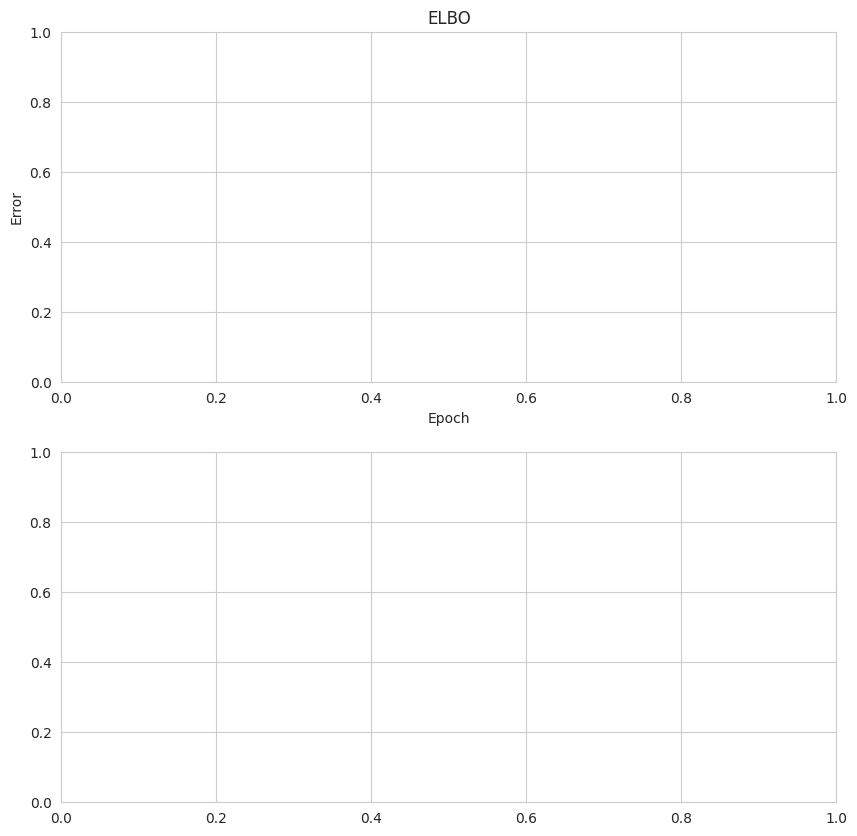

In [ ]:
skip = 5
save_img = os.path.join("midi","kl_elbo.png")
if skip > num_epochs:
    print("Can't skip more than epochs run.")
    skip = 0

f, axarr = plt.subplots(2, 1, figsize=(10, 10))

# Loss
ax = axarr[0]
ax.set_title("ELBO")
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

ax.plot(np.arange(skip, epoch+1), train_loss[skip:], color="black")
ax.plot(np.arange(skip, epoch+1), valid_loss[skip:], color="gray", linestyle="--")
ax.legend(['Training', 'Validation'])

# KL / reconstruction
ax = axarr[1]

ax.set_title("Kullback-Leibler Divergence")
ax.set_xlabel('Epoch')
ax.set_ylabel('KL divergence')


ax.plot(np.arange(skip, epoch+1), train_kl[skip:], color="black")
ax.plot(np.arange(skip, epoch+1), valid_kl[skip:], color="gray", linestyle="--")
ax.legend(['Training', 'Validation'])

plt.savefig(save_img)
plt.close(f)
display(Image(filename=save_img))

print("Time elapsed: {} seconds".format(end_time))

print("-----")

print("Final KL. Train: {}, Validation: {}".format(train_kl[-1], valid_kl[-1]))
print("Final loss. Train: {}, Validation: {}".format(train_loss[-1], valid_loss[-1]))

In [ ]:
if not os.path.exists('midi'):
    os.makedirs('midi')

x_hat_np = x_hat.detach().numpy()
x_hat_np.shape
for i, seq in enumerate(x_hat_np):
    row_maxes = seq.max(axis=1).reshape(-1, 1)
    midi_out = np.where(seq == row_maxes, 1, 0)

    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    np.savetxt("midi/csv_midi_out_{}.csv".format(i), midi_out, delimiter=";")

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/img_midi_{}.png".format(i))

    midi.write('midi/{}.mid'.format(i))

    #synth, rate = builder.play_midi(midi)
    #Audio(synth, rate=rate)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
x_np = x.detach().numpy()
x_np.shape
for i, seq in enumerate(x_np):
    midi_out = seq

    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Orig Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/img_midi_{}_orig.png".format(i))

    midi.write('midi/{}_orig.mid'.format(i))

    #synth, rate = builder.play_midi(midi)
    #Audio(synth, rate=rate)

In [ ]:
# gen_batch = 10
# z_gen = torch.randn(gen_batch, 256, 32).cuda()

# # Sample from latent space
# h_gen,c_gen,hconductor_gen,cconductor_gen = net.init_hidden(gen_batch)
# conductor_hidden_gen = (hconductor_gen,cconductor_gen)


# notes_gen = torch.zeros(gen_batch,TOTAL_NOTES,NUM_PITCHES,device=device)

# # For the first timestep the note is the embedding
# note_gen = torch.zeros(gen_batch, 1 , NUM_PITCHES,device=device)


# decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))

# counter=0

# print(sequence_length)
# print(notes_gen.shape)
# for i in range(totalbars):
#     decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
#     embedding_gen, conductor_hidden_gen = net.conductor(z_gen[:,i,:].view(gen_batch,1, -1), conductor_hidden_gen)

#     for _ in range(sequence_length):
#         # Concat embedding with previous note

#         e_gen = torch.cat([embedding_gen, note_gen], dim=-1)
#         e_gen = e_gen.view(gen_batch, 1, -1)

#         # Generate a single note (for each batch)
#         note_gen, decoder_hidden_gen = net.decoder(e_gen, decoder_hidden_gen)

#         aux_gen = net.linear(note_gen)

#         aux_gen=torch.softmax(aux_gen, dim=2);
#         #notes_gen[:,range(i*16,i*16+16),:]=aux_gen;
#         notes_gen[:,counter,:]=aux_gen.squeeze();

#         note_gen=aux_gen
#         counter = counter+1

# notes_gen

In [ ]:
gen_batch = 10
z_gen = torch.randn(gen_batch, 256, 64).cuda()

# Sample from latent space
h_gen,c_gen,hconductor_gen,cconductor_gen = net.init_hidden(gen_batch)
conductor_hidden_gen = (hconductor_gen,cconductor_gen)


notes_gen = torch.zeros(gen_batch,TOTAL_NOTES,NUM_PITCHES,device=device)

# For the first timestep the note is the embedding
note_gen = torch.zeros(gen_batch, 1 , NUM_PITCHES,device=device)


# Initialize decoder_hidden_gen with correct dimensions
# decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
# The decoder LSTM has n_layers_decoder=3 and decoders_hidden_size=128
decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                      torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))


counter=0

print(sequence_length)
print(notes_gen.shape)
for i in range(totalbars):
    # Reset decoder hidden state for each bar with correct dimensions
    # decoder_hidden_gen = (torch.randn(1,gen_batch, decoders_initial_size,device=device), torch.randn(1,gen_batch, decoders_initial_size,device=device))
    decoder_hidden_gen = (torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device),
                          torch.randn(net.decoder.num_layers, gen_batch, net.decoder.hidden_size, device=device))
    embedding_gen, conductor_hidden_gen = net.conductor(z_gen[:,i,:].view(gen_batch,1, -1), conductor_hidden_gen)

    for _ in range(sequence_length):
        # Concat embedding with previous note

        e_gen = torch.cat([embedding_gen, note_gen], dim=-1)
        e_gen = e_gen.view(gen_batch, 1, -1)

        # Generate a single note (for each batch)
        note_gen, decoder_hidden_gen = net.decoder(e_gen, decoder_hidden_gen)

        aux_gen = net.linear(note_gen)

        aux_gen=torch.softmax(aux_gen, dim=2);
        #notes_gen[:,range(i*16,i*16+16),:]=aux_gen;
        notes_gen[:,counter,:]=aux_gen.squeeze();

        note_gen=aux_gen
        counter = counter+1

notes_gen

16
torch.Size([10, 256, 61])


tensor([[[2.7891e-02, 2.1996e-03, 1.7329e-02,  ..., 5.7611e-05,
          3.7379e-06, 2.4908e-01],
         [3.7074e-03, 1.7828e-04, 2.5615e-03,  ..., 1.4304e-05,
          8.5609e-08, 1.0815e-01],
         [1.8360e-03, 4.0130e-04, 1.0947e-02,  ..., 1.8213e-05,
          1.6965e-07, 3.5182e-02],
         ...,
         [2.1947e-04, 7.3701e-06, 1.0459e-04,  ..., 5.1402e-08,
          2.5043e-08, 4.1553e-03],
         [2.1244e-04, 7.2283e-06, 1.0060e-04,  ..., 5.1680e-08,
          2.4685e-08, 4.0047e-03],
         [2.0913e-04, 7.0611e-06, 9.8019e-05,  ..., 5.1514e-08,
          2.4505e-08, 3.9641e-03]],

        [[1.4585e-02, 2.5519e-04, 5.7919e-03,  ..., 8.9472e-07,
          1.9988e-07, 8.5486e-01],
         [3.4521e-03, 1.0029e-04, 1.9206e-03,  ..., 1.4660e-07,
          6.6522e-08, 9.6160e-01],
         [2.3926e-03, 7.8701e-05, 1.8542e-03,  ..., 1.2721e-07,
          2.3074e-07, 9.7054e-01],
         ...,
         [1.3652e-04, 9.5446e-07, 5.9329e-05,  ..., 8.3531e-10,
          1.153

/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


Midi: 1 is all silent


/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


Midi: 3 is all silent


/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)
/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)
/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)
/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


Midi: 8 is all silent


/content/src/midi_builder.py:64: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  display.specshow(midi_sample.get_piano_roll(), y_axis='cqt_note', cmap=plt.cm.hot)


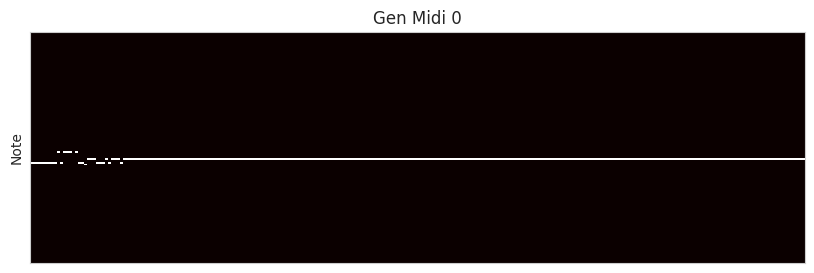

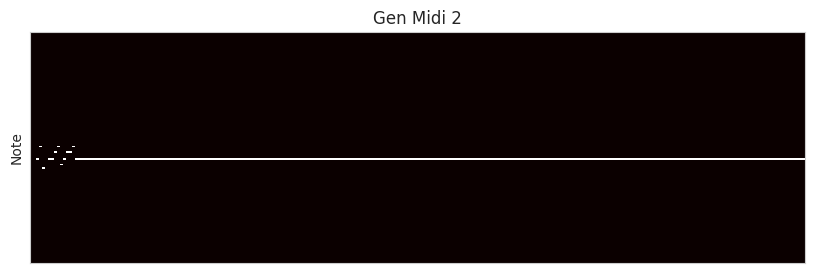

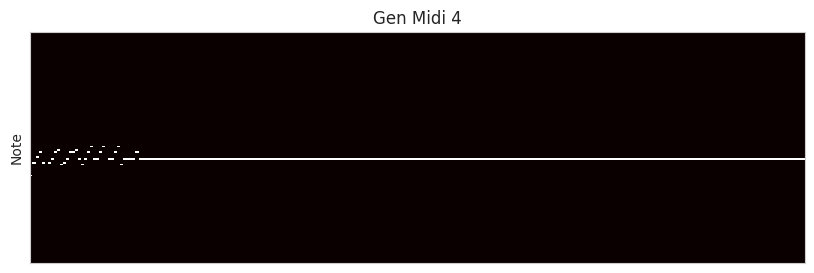

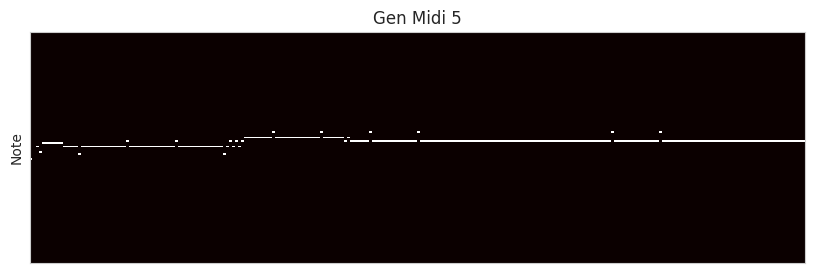

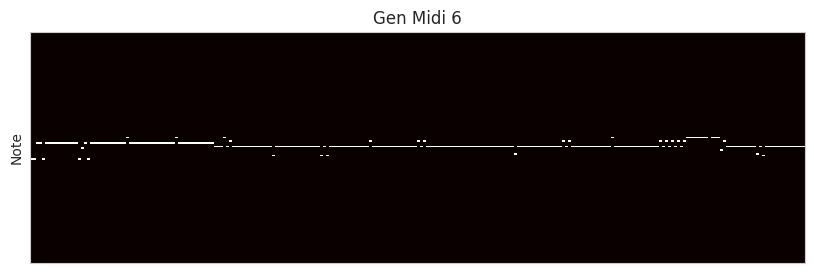

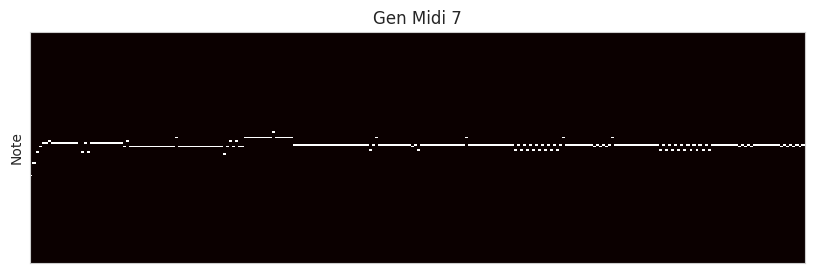

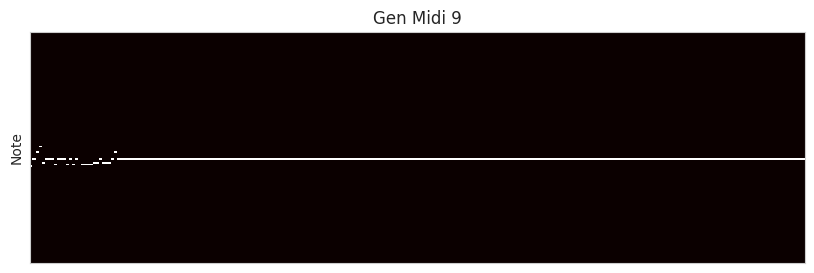

In [ ]:
notes_np = notes_gen.cpu().detach().numpy()
notes_np.shape
for i, seq in enumerate(notes_np):
    row_maxes = seq.max(axis=1).reshape(-1, 1)
    midi_out = np.where(seq == row_maxes, 1, 0)
    if np.all(midi_out[:,-1]):
        print("Midi: {} is all silent".format(i))
        continue

    np.savetxt("midi/gen_csv_midi_out_{}.csv".format(i), midi_out, delimiter=";")

    midi = builder.midi_from_piano_roll(midi_out[:,:-1]) # Select all notes but the silent one
    plt.figure(figsize=(10, 3))
    plt.title("Gen Midi {}".format(i))

    builder.plot_midi(midi)
    plt.savefig("midi/gen_img_midi_{}.png".format(i))

    midi.write('midi/gen_{}.mid'.format(i))